# TransFS comparisons

This is a comparison of TransFS scoring using runs with a small subset (~1%) of the
candidate molecules using Mpro-x0678 as the receptor.
 
1329 candidate molecules were docked generating 25 poses. Those were scored with
SuCOS and TransFS. 4 different TransFS models were considered:

- original (no threshold)
- 200nM activity threshold
- 50nM activity threshold
- 10nM activity threshold

Comparisons undertaken are:

- TransFS scores at 10nM threshold against 2 independent sets of poses
- TransFS scores at 10nM threshold against the same set of poses
- Comparison of the original model with the 10nM, 50nM and 200nM models

## Data files
  
- run1_1.sdf.gz - scoring using 10nM model 
- run1_2.sdf.gz - repeat of run1_1.sdf.gz uisng the same docking poses
- run2_1.sdf.gz - repeat of run1_1.sdf.gz uisng different docking poses
- run1_orig.sdf.gz - repeat of run1_1.sdf.gz uisng the same docking poses and the original model
- run1_200nM.sdf.gz - repeat of run1_1.sdf.gz uisng the same docking poses and the 200nM model
- run1_50nM.sdf.gz - repeat of run1_1.sdf.gz uisng the same docking poses and the 50nM model


In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import plotly
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio

In [2]:
from rdkit import Chem
from rdkit.Chem import AllChem
from IPython.display import SVG
from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem import PandasTools

RDKit WARNING: [11:15:49] Enabling RDKit 2019.09.3 jupyter extensions


In [3]:
# Set the default renderer to png as the data is huge and overwhelms the Javascript renderers
pio.renderers.default = 'png'

In [4]:
# 10nM model run 1
df1_10_1 = PandasTools.LoadSDF('run1_1.sdf.gz', molColName='Molecule')
df1_10_1.shape

(33225, 50)

In [5]:
# 10nM model run 2 (same poses)
df1_10_2 = PandasTools.LoadSDF('run1_2.sdf.gz', molColName='Molecule')
df1_10_2.shape

(33225, 50)

In [6]:
# 10nM model run 3 (independent poses)
df2_10_1 = PandasTools.LoadSDF('run2_1.sdf.gz', molColName='Molecule')
df2_10_1.shape

(33225, 50)

In [7]:
# Drop the columns we don't need and rename some

columns_to_remove = ['CHROM.0', 'CHROM.1', 'RI', 'Rbt.Current_Directory', 'Rbt.Executable', 'Rbt.Library', 
                     'Rbt.Parameter_File', 'Rbt.Receptor', 'Name', 'SCORE.INTER', 'SCORE.INTER.CONST',
                     'SCORE.INTER.POLAR', 'SCORE.INTER.REPUL', 'SCORE.INTER.ROT', 'SCORE.INTER.VDW',
                     'SCORE.INTER.norm', 'SCORE.INTRA', 'SCORE.INTRA.DIHEDRAL', 'SCORE.INTRA.DIHEDRAL.0',
                     'SCORE.INTRA.POLAR', 'SCORE.INTRA.POLAR.0', 'SCORE.INTRA.REPUL', 'SCORE.INTRA.REPUL.0',
                     'SCORE.INTRA.VDW', 'SCORE.INTRA.VDW.0', 'SCORE.INTRA.norm', 'SCORE.RESTR',
                     'SCORE.RESTR.norm', 'SCORE.SYSTEM', 'SCORE.SYSTEM.CONST', 'SCORE.SYSTEM.DIHEDRAL',
                     'SCORE.SYSTEM.POLAR', 'SCORE.SYSTEM.REPUL', 'SCORE.SYSTEM.VDW', 'SCORE.heavy',
                     'SCORE.SYSTEM.norm', 'TransFSReceptor', 'Name', 'Max_SuCOS_Cluster'
                    ]

columns_to_rename = { 'ID': 'NSMILES'} # NSMILES means Neutral SMILES e.g. prior to charge enumeration

df1_10_1 = df1_10_1.drop(columns=columns_to_remove)
df1_10_1 = df1_10_1.rename(columns=columns_to_rename)

df2_10_1 = df2_10_1.drop(columns=columns_to_remove)
df2_10_1 = df2_10_1.rename(columns=columns_to_rename)

df1_10_2 = df1_10_2.drop(columns=columns_to_remove)
df1_10_2 = df1_10_2.rename(columns=columns_to_rename)

In [8]:
df1_10_1.dtypes

SCORE                         object
SCORE.norm                    object
Max_SuCOS_Score               object
Max_SuCOS_FeatureMap_Score    object
Max_SuCOS_Protrude_Score      object
Max_SuCOS_Index               object
Cum_SuCOS_Score               object
Cum_SuCOS_FeatureMap_Score    object
Cum_SuCOS_Protrude_Score      object
TransFSScore                  object
NSMILES                       object
Molecule                      object
dtype: object

# Compare scoring at 10mn on 2 different docking runs

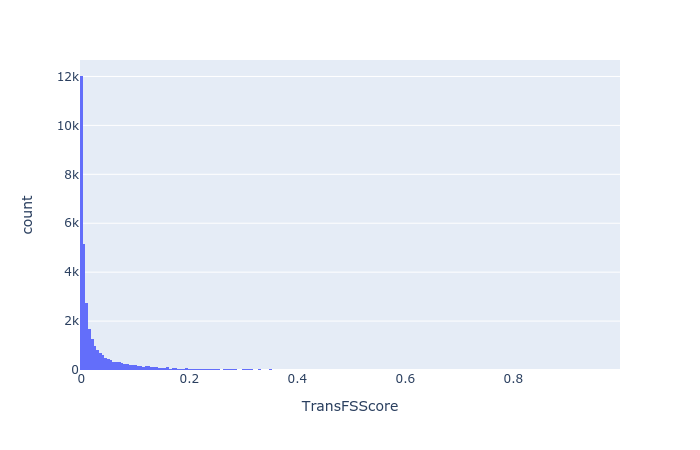

In [9]:
fig = px.histogram(df1_10_1, x="TransFSScore")
fig.show()

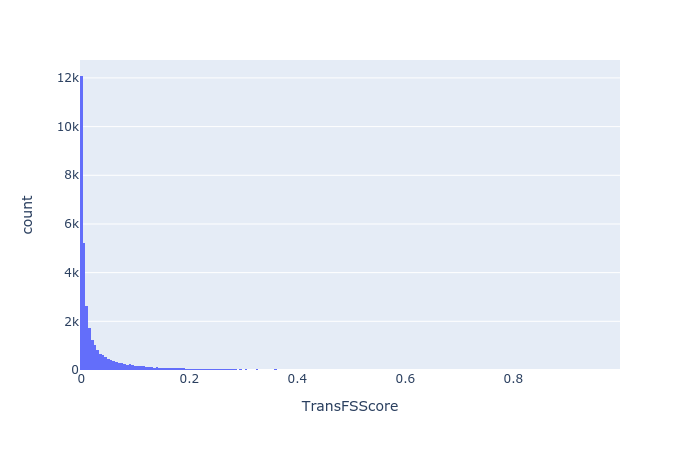

In [10]:
fig = px.histogram(df2_10_1, x="TransFSScore")
fig.show()

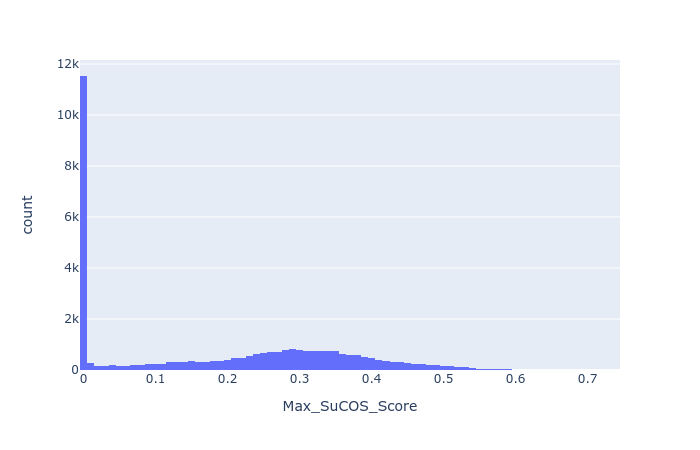

In [11]:
fig = px.histogram(df1_10_1, x="Max_SuCOS_Score")
fig.show()

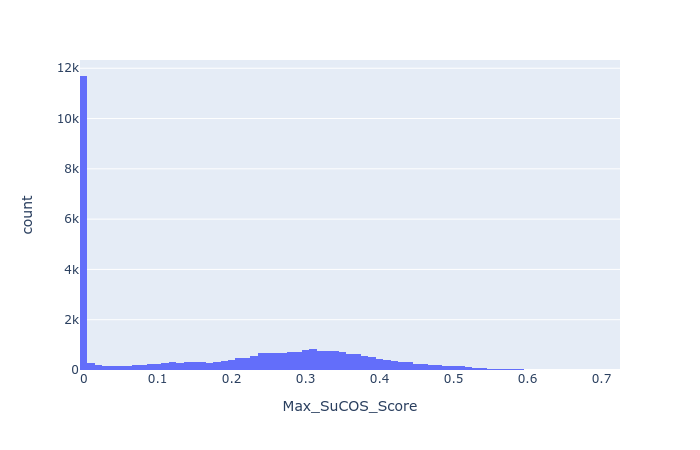

In [12]:
fig = px.histogram(df2_10_1, x="Max_SuCOS_Score")
fig.show()

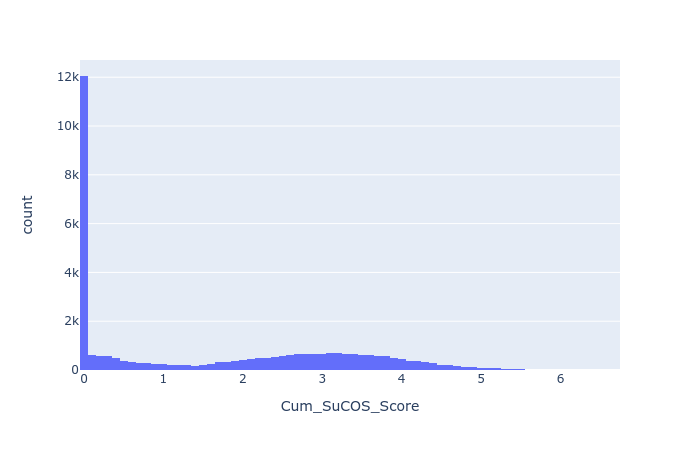

In [13]:
fig = px.histogram(df1_10_1, x="Cum_SuCOS_Score")
fig.show()

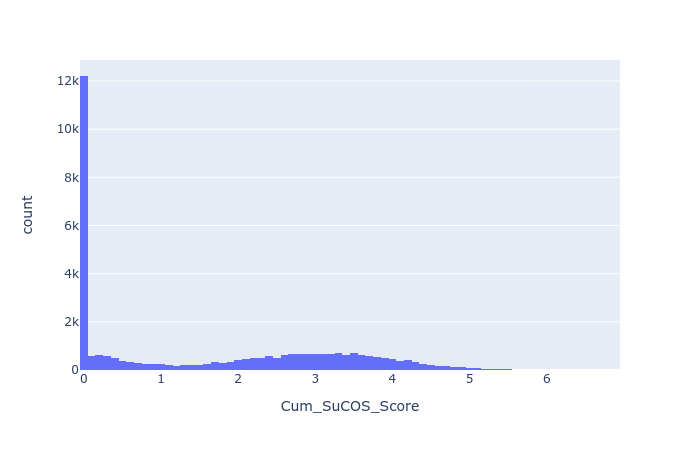

In [14]:
fig = px.histogram(df2_10_1, x="Cum_SuCOS_Score")
fig.show()

# Filtering
Group by SMILES and retain only the best TransFS scoring molecule

In [15]:
df1_10_1x = df1_10_1.groupby(["NSMILES"])
df1_10_1x = df1_10_1x.apply(lambda x: x.sort_values(['TransFSScore'], ascending=False))
df1_10_1x = df1_10_1x.reset_index(drop=True)
df1_10_1x = df1_10_1x.groupby('NSMILES').head(1)
df1_10_1x.shape

(600, 12)

In [16]:
df2_10_1x = df2_10_1.groupby(["NSMILES"])
df2_10_1x = df2_10_1x.apply(lambda x: x.sort_values(['TransFSScore'], ascending=False))
df2_10_1x = df2_10_1x.reset_index(drop=True)
df2_10_1x = df2_10_1x.groupby('NSMILES').head(1)
df2_10_1x.shape

(600, 12)

In [17]:
df1_10_2x = df1_10_2.groupby(["NSMILES"])
df1_10_2x = df1_10_2x.apply(lambda x: x.sort_values(['TransFSScore'], ascending=False))
df1_10_2x = df1_10_2x.reset_index(drop=True)
df1_10_2x = df1_10_2x.groupby('NSMILES').head(1)
df1_10_2x.shape

(600, 12)

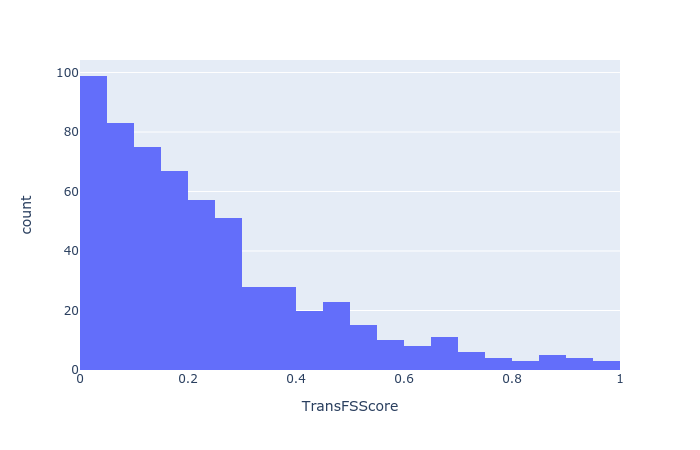

In [18]:
fig = px.histogram(df1_10_1x, x="TransFSScore")
fig.show()

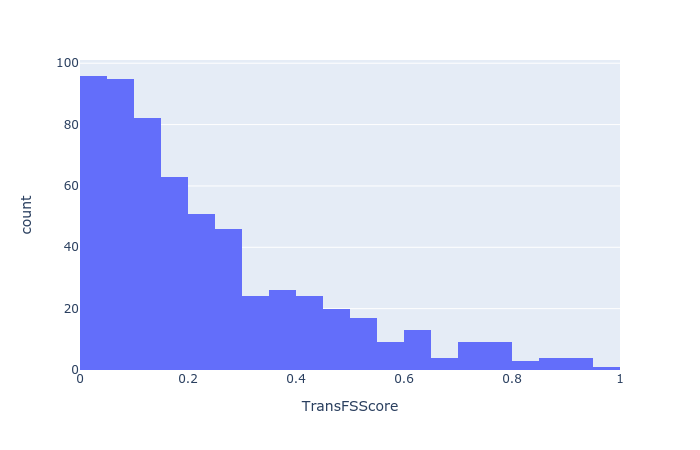

In [19]:
fig = px.histogram(df2_10_1x, x="TransFSScore")
fig.show()

In [20]:
merged12 = pd.merge(df1_10_1x, df2_10_1x, on='NSMILES')
merged12.dtypes

SCORE_x                         object
SCORE.norm_x                    object
Max_SuCOS_Score_x               object
Max_SuCOS_FeatureMap_Score_x    object
Max_SuCOS_Protrude_Score_x      object
Max_SuCOS_Index_x               object
Cum_SuCOS_Score_x               object
Cum_SuCOS_FeatureMap_Score_x    object
Cum_SuCOS_Protrude_Score_x      object
TransFSScore_x                  object
NSMILES                         object
Molecule_x                      object
SCORE_y                         object
SCORE.norm_y                    object
Max_SuCOS_Score_y               object
Max_SuCOS_FeatureMap_Score_y    object
Max_SuCOS_Protrude_Score_y      object
Max_SuCOS_Index_y               object
Cum_SuCOS_Score_y               object
Cum_SuCOS_FeatureMap_Score_y    object
Cum_SuCOS_Protrude_Score_y      object
TransFSScore_y                  object
Molecule_y                      object
dtype: object

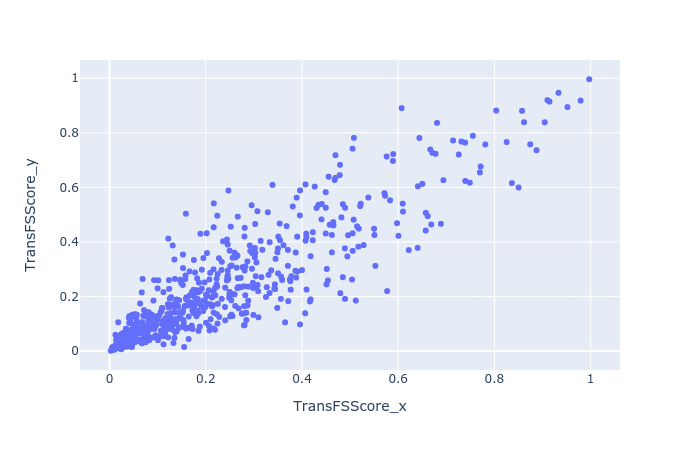

In [21]:
fig = px.scatter(merged12, x="TransFSScore_x", y="TransFSScore_y")
fig.show()

# reasonable, but not fantastic correlation, but with only 25 poses being generated the same "best" pose
# will not be found that often

# Compare two 10nm runs on the same poses

In [22]:
merged11 = pd.merge(df1_10_1x, df1_10_2x, on='NSMILES')
merged11.dtypes

SCORE_x                         object
SCORE.norm_x                    object
Max_SuCOS_Score_x               object
Max_SuCOS_FeatureMap_Score_x    object
Max_SuCOS_Protrude_Score_x      object
Max_SuCOS_Index_x               object
Cum_SuCOS_Score_x               object
Cum_SuCOS_FeatureMap_Score_x    object
Cum_SuCOS_Protrude_Score_x      object
TransFSScore_x                  object
NSMILES                         object
Molecule_x                      object
SCORE_y                         object
SCORE.norm_y                    object
Max_SuCOS_Score_y               object
Max_SuCOS_FeatureMap_Score_y    object
Max_SuCOS_Protrude_Score_y      object
Max_SuCOS_Index_y               object
Cum_SuCOS_Score_y               object
Cum_SuCOS_FeatureMap_Score_y    object
Cum_SuCOS_Protrude_Score_y      object
TransFSScore_y                  object
Molecule_y                      object
dtype: object

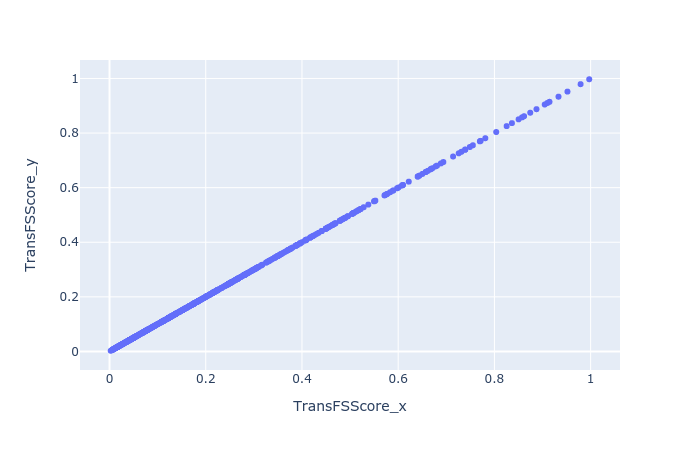

In [23]:
fig = px.scatter(merged11, x="TransFSScore_x", y="TransFSScore_y")
fig.show()

# good! TransFS is reproducible given the same poses 

# Compare 10nM model with original model

In [24]:
df1_orig = PandasTools.LoadSDF('run1_orig.sdf.gz', molColName='Molecule')
df1_orig = df1_orig.drop(columns=columns_to_remove)
df1_orig = df1_orig.rename(columns=columns_to_rename)
df1_orig.shape

(33225, 12)

In [25]:
df1_origx = df1_orig.groupby(["NSMILES"])
df1_origx = df1_origx.apply(lambda x: x.sort_values(['TransFSScore'], ascending=False))
df1_origx = df1_origx.reset_index(drop=True)
df1_origx = df1_origx.groupby('NSMILES').head(1)
df1_origx.shape

(600, 12)

In [26]:
merged_orig_10 = pd.merge(df1_origx, df1_10_1x, on='NSMILES')
merged_orig_10.shape

(600, 23)

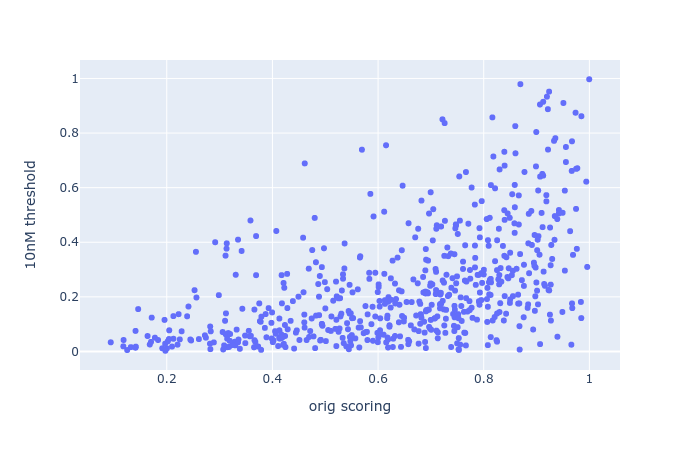

In [27]:
fig = px.scatter(merged_orig_10, x="TransFSScore_x", y="TransFSScore_y")
fig.update_layout(
    xaxis_title="orig scoring",
    yaxis_title="10nM threshold"
)
fig.show()

# Compare 50nM model with original model

In [28]:
df1_50 = PandasTools.LoadSDF('run1_50nM.sdf.gz', molColName='Molecule')
df1_50 = df1_50.drop(columns=columns_to_remove)
df1_50 = df1_50.rename(columns=columns_to_rename)
df1_50.shape

(33225, 12)

In [29]:
df1_50x = df1_50.groupby(["NSMILES"])
df1_50x = df1_50x.apply(lambda x: x.sort_values(['TransFSScore'], ascending=False))
df1_50x = df1_50x.reset_index(drop=True)
df1_50x = df1_50x.groupby('NSMILES').head(1)
df1_50x.shape

(600, 12)

In [30]:
merged_orig_50 = pd.merge(df1_origx, df1_50x, on='NSMILES')
merged_orig_50.shape

(600, 23)

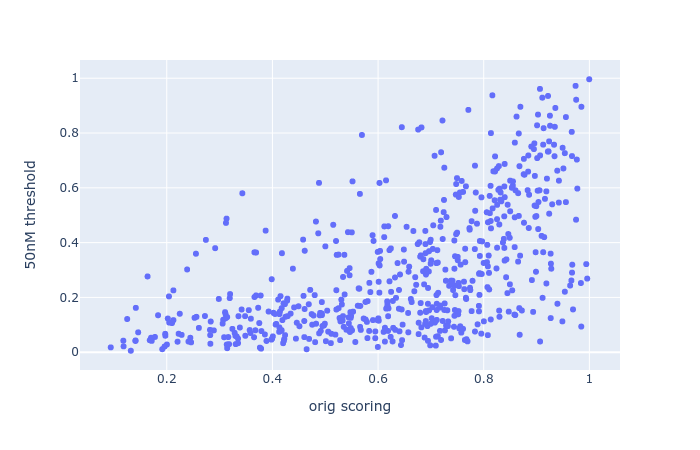

In [31]:
fig = px.scatter(merged_orig_50, x="TransFSScore_x", y="TransFSScore_y")
fig.update_layout(
    xaxis_title="orig scoring",
    yaxis_title="50nM threshold"
)
fig.show()

# Compare 200nM model with original model

In [32]:
df1_200 = PandasTools.LoadSDF('run1_200nM.sdf.gz', molColName='Molecule')
df1_200 = df1_200.drop(columns=columns_to_remove)
df1_200 = df1_200.rename(columns=columns_to_rename)
df1_200.shape

(33225, 12)

In [33]:
df1_200x = df1_200.groupby(["NSMILES"])
df1_200x = df1_200x.apply(lambda x: x.sort_values(['TransFSScore'], ascending=False))
df1_200x = df1_200x.reset_index(drop=True)
df1_200x = df1_200x.groupby('NSMILES').head(1)
df1_200x.shape

(600, 12)

In [34]:
merged_orig_200 = pd.merge(df1_origx, df1_200x, on='NSMILES')
merged_orig_200.shape

(600, 23)

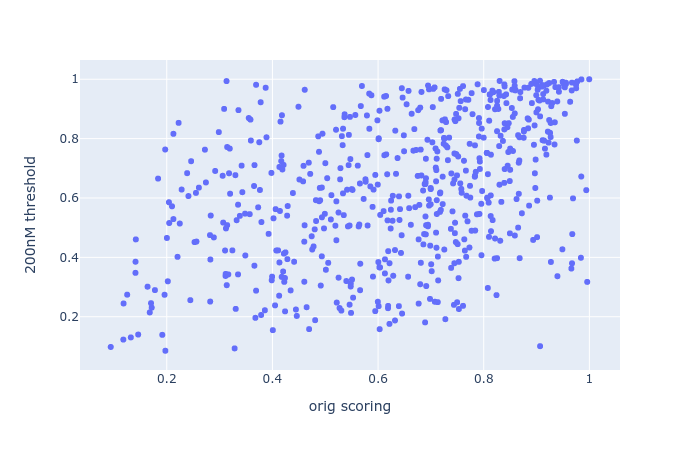

In [35]:
fig = px.scatter(merged_orig_200, x="TransFSScore_x", y="TransFSScore_y")
fig.update_layout(
    xaxis_title="orig scoring",
    yaxis_title="200nM threshold"
)
fig.show()